## 04 R실습: 정규모형과 가설 검정

### 01 육군 신체측정 정보

- 자료의 설명
  - 자료의 변수는 총 10개로 다음과 같다.
    - 순번, 측정일자, 가슴둘레, 소매길이, 신장, 허리, 샅높이, 머리둘레, 발길이, 몸무게 이다.
  - 모든 길이의 단위는 센티미터이고 몸무게의 단위는 킬로그램이다.

In [6]:
# 자료 읽기
army = read.csv("army-physical.csv", header=T, sep=",")
head(army)
str(army)

,seq,date,bust,sleeve,height,waist,crotch,head,foot,weight
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,52094,2014,91.8,88.5,177.8,84.1,83.9,57.8,27.2,78.8
2,57714,2014,94.7,86.3,171.9,89.2,78.6,58.6,26.8,71.9
3,10741,20140224,114.0,89.4,179.3,109.8,84.8,60.8,29.9,105.9
4,8843,2013,105.7,88.1,177.0,94.4,77.9,57.6,28.0,81.1
5,19853,20140414,100.6,87.5,175.7,92.6,76.4,58.1,27.8,78.8
6,42241,2013,104.2,88.6,176.5,98.1,81.7,60.4,26.7,83.8


'data.frame':	200 obs. of  10 variables:
 $ seq   : int  52094 57714 10741 8843 19853 42241 46561 40117 64329 26347 ...
 $ date  : int  2014 2014 20140224 2013 20140414 2013 2013 2013 2014 2013 ...
 $ bust  : num  91.8 94.7 114 105.7 100.6 ...
 $ sleeve: num  88.5 86.3 89.4 88.1 87.5 88.6 83.4 90.6 85 86.6 ...
 $ height: num  178 172 179 177 176 ...
 $ waist : num  84.1 89.2 109.8 94.4 92.6 ...
 $ crotch: num  83.9 78.6 84.8 77.9 76.4 81.7 73.8 85.1 74.5 76.6 ...
 $ head  : num  57.8 58.6 60.8 57.6 58.1 60.4 56.7 60 56.7 54.3 ...
 $ foot  : num  27.2 26.8 29.9 28 27.8 26.7 30.8 27.1 26.5 27.9 ...
 $ weight: num  78.8 71.9 105.9 81.1 78.8 ...


[1] 200  10

      seq             date               bust            sleeve     
 Min.   :   26   Min.   :    2013   Min.   : 77.90   Min.   :79.80  
 1st Qu.:13225   1st Qu.:    2013   1st Qu.: 90.30   1st Qu.:85.47  
 Median :29921   Median :    2013   Median : 96.35   Median :87.30  
 Mean   :32475   Mean   : 4130355   Mean   : 96.41   Mean   :87.13  
 3rd Qu.:50928   3rd Qu.:    2014   3rd Qu.:101.42   3rd Qu.:88.80  
 Max.   :72625   Max.   :20140428   Max.   :122.60   Max.   :93.40  
     height          waist            crotch           head      
 Min.   :160.2   Min.   : 63.70   Min.   :72.20   Min.   :52.40  
 1st Qu.:171.3   1st Qu.: 79.17   1st Qu.:76.50   1st Qu.:56.70  
 Median :174.8   Median : 85.25   Median :78.80   Median :57.60  
 Mean   :174.3   Mean   : 86.41   Mean   :79.09   Mean   :57.88  
 3rd Qu.:177.4   3rd Qu.: 92.65   3rd Qu.:81.33   3rd Qu.:59.23  
 Max.   :186.8   Max.   :116.40   Max.   :90.10   Max.   :62.70  
      foot           weight      
 Min.   :23.90   Min.

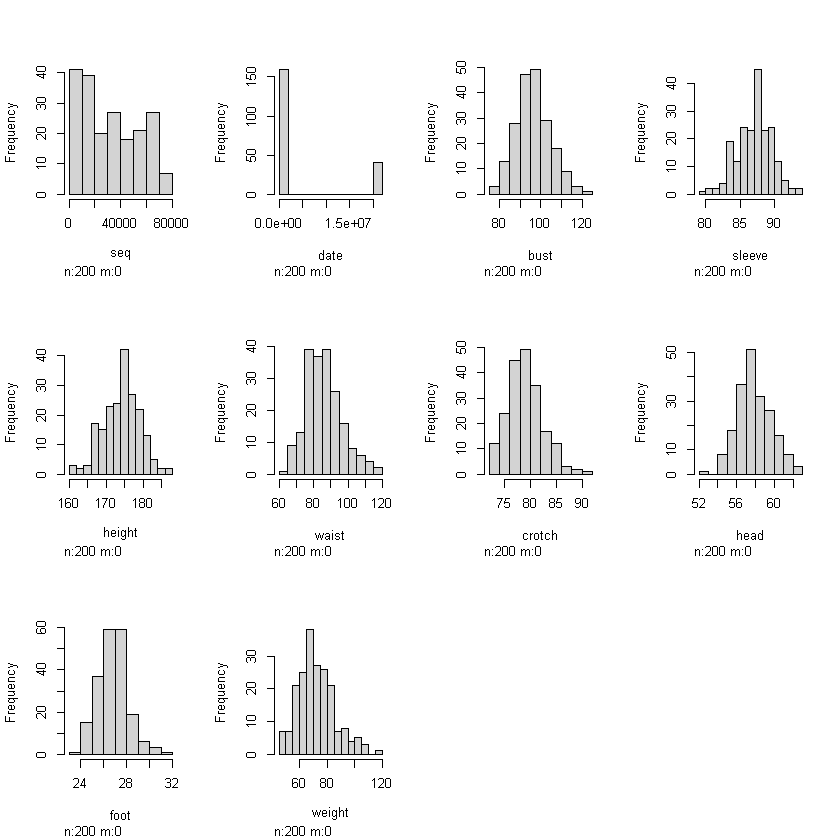

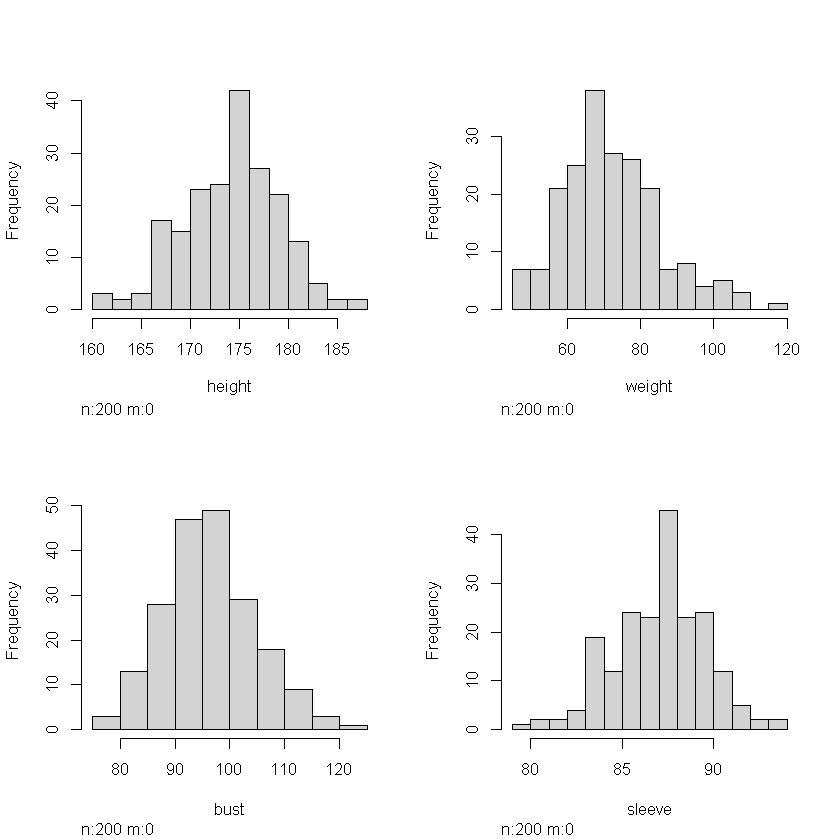

In [7]:
# 1변량 자료 탐색
library(dplyr)
library(ggplot2)
library(Hmisc)

dim(army)
summary(army)
hist(army)
army%>%select(height, weight, bust, sleeve) %>% hist

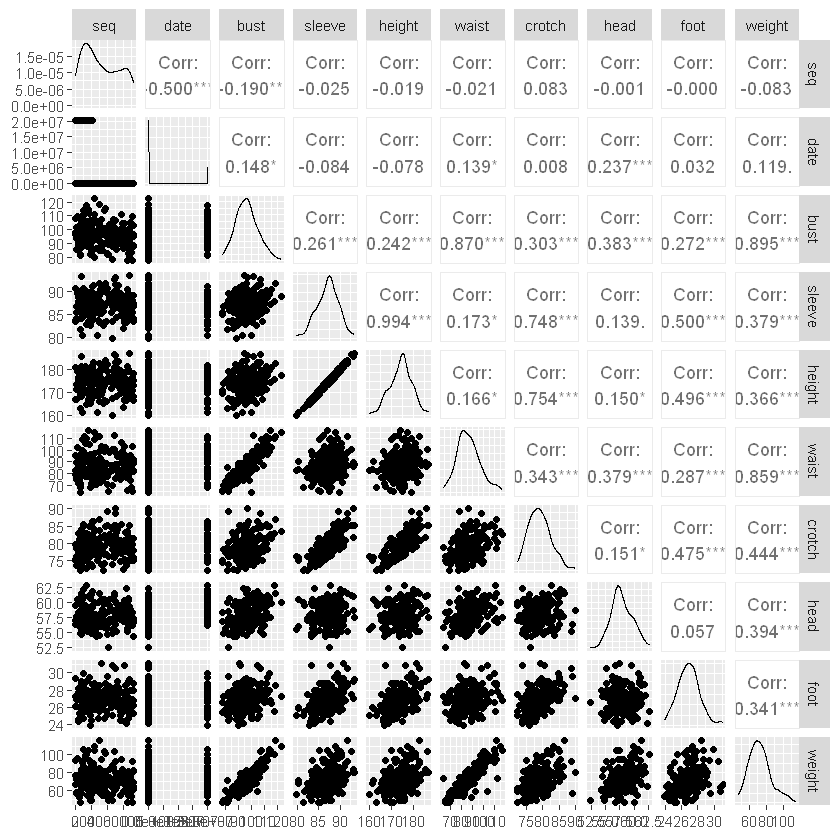

,seq,date,bust,sleeve,height,waist,crotch,head,foot,weight
seq,4.754241e+08,-8.890490e+10,-3.490506e+04,-1.361658e+03,-2.007758e+03,-4.747225e+03,6.166396e+03,-4.322563e+01,-4.415829e-01,-2.405169e+04
date,-8.890490e+10,6.642650e+13,1.018336e+07,-1.710937e+06,-3.158609e+06,1.178667e+07,2.117106e+05,3.503455e+06,3.409322e+05,1.282666e+07
bust,-3.490506e+04,1.018336e+07,7.118856e+01,5.514864e+00,1.015171e+01,7.612066e+01,8.729787e+00,5.847920e+00,3.034978e+00,9.982525e+01
sleeve,-1.361658e+03,-1.710937e+06,5.514864e+00,6.266303e+00,1.235539e+01,4.477823e+00,6.391180e+00,6.290854e-01,1.656576e+00,1.254483e+01
height,-2.007758e+03,-3.158609e+06,1.015171e+01,1.235539e+01,2.468030e+01,8.561106e+00,1.279055e+01,1.346533e+00,3.260013e+00,2.400609e+01
waist,-4.747225e+03,1.178667e+07,7.612066e+01,4.477823e+00,8.561106e+00,1.075037e+02,1.212924e+01,7.108302e+00,3.941429e+00,1.176892e+02
crotch,6.166396e+03,2.117106e+05,8.729787e+00,6.391180e+00,1.279055e+01,1.212924e+01,1.164538e+01,9.341307e-01,2.143510e+00,2.002048e+01
head,-4.322563e+01,3.503455e+06,5.847920e+00,6.290854e-01,1.346533e+00,7.108302e+00,9.341307e-01,3.279397e+00,1.363015e-01,9.439367e+00
foot,-4.415829e-01,3.409322e+05,3.034978e+00,1.656576e+00,3.260013e+00,3.941429e+00,2.143510e+00,1.363015e-01,1.748763e+00,5.952813e+00
weight,-2.405169e+04,1.282666e+07,9.982525e+01,1.254483e+01,2.400609e+01,1.176892e+02,2.002048e+01,9.439367e+00,5.952813e+00,1.746530e+02


,seq,date,bust,sleeve,height,waist,crotch,head,foot,weight
seq,1.000000e+00,-0.500281482,-0.1897329,-0.02494720,-0.01853513,-0.02099847,0.082873172,-0.001094722,-1.531462e-05,-0.08346742
date,-5.002815e-01,1.000000000,0.1480864,-0.08386053,-0.07800996,0.13947902,0.007611933,0.237371656,3.163238e-02,0.11908442
bust,-1.897329e-01,0.148086401,1.0000000,0.26111030,0.24219163,0.87013339,0.303194732,0.382735980,2.720101e-01,0.89525596
sleeve,-2.494720e-02,-0.083860533,0.2611103,1.00000000,0.99351765,0.17252405,0.748166877,0.138773630,5.004264e-01,0.37920227
height,-1.853513e-02,-0.078009960,0.2421916,0.99351765,1.00000000,0.16620461,0.754461794,0.149673433,4.962250e-01,0.36564381
waist,-2.099847e-02,0.139479023,0.8701334,0.17252405,0.16620461,1.00000000,0.342803438,0.378579620,2.874595e-01,0.85888845
crotch,8.287317e-02,0.007611933,0.3031947,0.74816688,0.75446179,0.34280344,1.000000000,0.151158906,4.749885e-01,0.44392501
head,-1.094722e-03,0.237371656,0.3827360,0.13877363,0.14967343,0.37857962,0.151158906,1.000000000,5.691650e-02,0.39441896
foot,-1.531462e-05,0.031632377,0.2720101,0.50042639,0.49622500,0.28745949,0.474988484,0.056916503,1.000000e+00,0.34061887
weight,-8.346742e-02,0.119084420,0.8952560,0.37920227,0.36564381,0.85888845,0.443925012,0.394418964,3.406189e-01,1.00000000


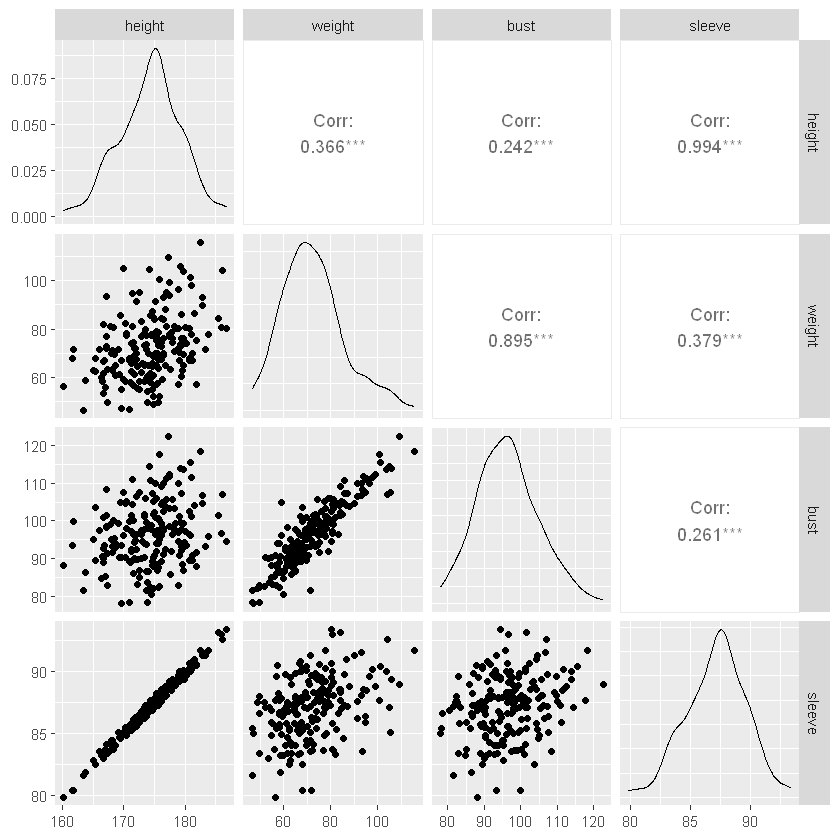

In [8]:
# 2변량 자료탐색
library(GGally)
army %>% ggpairs
army %>% select(height, weight, bust, sleeve) %>% ggpairs
cov(army)
cor(army)

### 문제

- 대한민국 육군들의 키의 평균의 사후분포를 구하고자 한다.
- 모형<br>
  <img src="https://latex.codecogs.com/svg.image?X_1,X_2,\cdots,X_n|\theta\sim&space;N(\theta,\sigma^2),\;\;\;\theta\in\mathbb{R},\sigma^2=4.96^2">
- 사전분포<br>
  <img src="https://latex.codecogs.com/svg.image?\theta\sim&space;N(\mu=174.3125,\tau^2=4.96^2\times100)">
- 사후분포<br>
  <img src="https://latex.codecogs.com/svg.image?\theta|x\sim&space;N\left(\frac{\frac{1}{\tau^2}\mu&plus;\frac{n}{\sigma^2}\bar{X}}{\frac{1}{\tau^2}&plus;\frac{n}{\sigma^2}},\frac{1}{\frac{1}{\tau^2}&plus;\frac{n}{\sigma^2}}\right)">

- 사전분포와 사후분포를 한 그림에 그리고 레전드를 넣으시오

In [9]:
x = army$height
n = length(x)
sig2 = var(x)
mu0 = mean(x)
tau20 = sig2*100
tau21 = 1/(1/tau20+n/sig2)
mu1 = tau21*(mu0/tau20+n*mean(x)/sig2)